강남구 국민평형대 아파트의 12개월 간의 실거래가 데이터를 추출하여, 동별 증감률을 구하고자 한다.

동별 월간 데이터들의 평균을 구해 스캐터플랏을 만들고, 트랜드라인을 그어 증감률을 산정하였다.

이에 착안하여 증감률을 구하는 함수를 만든 후, 반복문을 사용하여 동별 증감률을 구하였다.

In [ ]:
from Portfolio.매매가 import fetch_apt_sale_data
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pandas as pd

service_key = "sgOQlwpackhO01oaCAAcwfJy4IGwN%2F2uLcXifUcmx%2FIwLRwPkaBTgz9kBtg5oQg8YRxPZICHxtKF%2BsXKn4rf%2Fw%3D%3D"
months = 12
end_date = datetime.now()
dates = [(end_date - relativedelta(months=i)).strftime('%Y%m') for i in range(months)]
n = 10000
gu_code = 11680

df_combined = pd.DataFrame()

for date in dates:
    df = fetch_apt_sale_data(service_key, gu_code, date, n)
    df_filtered = df[(df['apt_userArea'] > 84) & (df['apt_userArea'] < 85)]
    df_combined = pd.concat([df_combined, df_filtered], ignore_index=True)

df_combined["date"] = df_combined["deal_year"].astype(str) + df_combined["deal_month"].astype(str).str.zfill(2)
df_combined = df_combined.sort_values('dong_name', ascending=True)



In [117]:
df_combined

,dong_name,apt_name,apt_userArea,apt_floor,deal_amount,deal_year,deal_month,deal_day,gu_code,apt_buildYear,date
266,개포동,현대2,84.810,1,248000,2024,8,31,11680,1986,202408
666,개포동,개포래미안포레스트,84.830,28,258000,2024,5,18,11680,2020,202405
667,개포동,포이벨리,84.690,2,89000,2024,5,23,11680,2001,202405
670,개포동,개포래미안포레스트,84.860,3,255000,2024,5,20,11680,2020,202405
676,개포동,개포래미안포레스트,84.830,20,261000,2024,5,11,11680,2020,202405
...,...,...,...,...,...,...,...,...,...,...,...
141,청담동,삼성청담아파트,84.980,1,187500,2024,11,8,11680,1999,202411
140,청담동,청담4차이-편한세상,84.570,7,218000,2024,11,1,11680,2011,202411
322,청담동,청담건영,84.595,9,300000,2024,8,16,11680,1994,202408
84,청담동,삼환(101동),84.980,2,180000,2024,12,7,11680,1999,202412


In [113]:
dong_name = df_combined['dong_name'].unique()

for dong in dong_name:
    globals()[f'df_{dong}'] = (
        df_combined[df_combined["dong_name"].str.contains(dong)].groupby('date')['deal_amount'].mean().round(0).reset_index()
    )
dong_name

array(['개포동', '논현동', '대치동', '도곡동', '삼성동', '세곡동', '수서동', '신사동', '압구정동',
       '역삼동', '율현동', '일원동', '자곡동', '청담동'], dtype=object)

In [114]:
df_대치동

,date,deal_amount
0,202403,275333.0
1,202404,288526.0
2,202405,268192.0
3,202406,286273.0
4,202407,287778.0
5,202408,289250.0
6,202409,290750.0
7,202410,304614.0
8,202411,335750.0
9,202412,307700.0


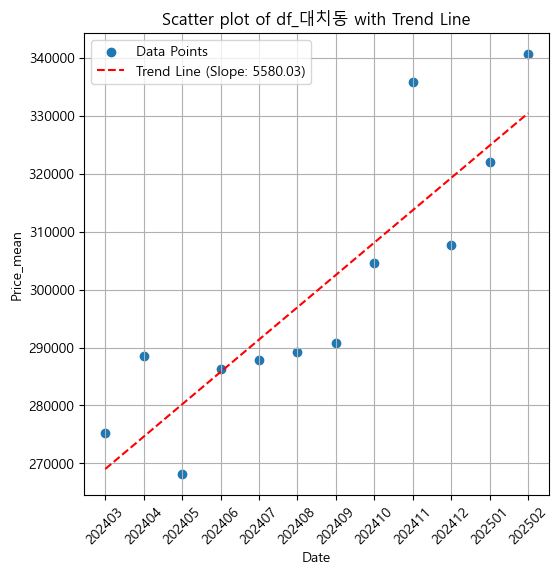

The slope of the trend line is: 5580.03
The percentage change of the trend line is: 22.81%
5580.031468531458


In [115]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(6, 6))

# Scatter plot
plt.scatter(df_대치동['date'], df_대치동['deal_amount'], label='Data Points')

# Fit a trend line
x = np.arange(len(df_대치동['date']))  # Numeric x-axis values
y = df_대치동['deal_amount']
coefficients = np.polyfit(x, y, 1)  # Linear fit
trend_line = np.polyval(coefficients, x)
slope = coefficients[0]  # Get the slope of the trend line

# Calculate percentage change of trend line
initial_value = trend_line[0]  # First value of the trend line
final_value = trend_line[-1]  # Last value of the trend line
percentage_change = ((final_value - initial_value) / initial_value) * 100

# Add the trend line to the plot
plt.plot(df_대치동['date'], trend_line, color='red', linestyle='--', label=f'Trend Line (Slope: {slope:.2f})')

# Add labels, title, and legend
plt.title('Scatter plot of df_대치동 with Trend Line')
plt.xlabel('Date')
plt.ylabel('Price_mean')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Print the slope and percentage change values
print(f"The slope of the trend line is: {slope:.2f}")
print(f"The percentage change of the trend line is: {percentage_change:.2f}%")
print(coefficients[0])


In [116]:
def value_rate(df):
    import numpy as np

    x = np.arange(len(df['date']))
    y = df['deal_amount']
    coefficients = np.polyfit(x, y, 1)
    trend_line = np.polyval(coefficients, x)

    initial_value = trend_line[0]
    final_value = trend_line[-1]
    percentage_change = ((final_value - initial_value) / initial_value) * 100

    return percentage_change

df_rate = pd.DataFrame()
in_de_rate_list = []

for dong in dong_name:
    df_dong = (
        df_combined[df_combined['dong_name'].str.contains(dong)]
        .groupby('date')['deal_amount']
        .mean()
        .reset_index()
    )

    in_de_rate = value_rate(df_dong)
    in_de_rate_list.append(
        {'dong_name' : dong, 'in_de_rate' : in_de_rate}
    )

df_rate = pd.DataFrame(in_de_rate_list)
df_rate

,dong_name,in_de_rate
0,개포동,15.213368
1,논현동,43.370646
2,대치동,22.813926
3,도곡동,7.087551
4,삼성동,-0.174964
5,세곡동,14.663017
6,수서동,21.839380
7,신사동,32.484762
8,압구정동,10.152284
9,역삼동,9.347706
